This is a representation for the energy and the wavefunctions for a particle inside a harmonic oscillator potential

Potential(around $x_0$):
$$
V(x) = \frac{1}{2}m\omega^2x^2 \hspace{0.5cm}\text{where }\omega \equiv \sqrt{\frac{k}{m}}
$$

Wave function ($H_n$ being the [Hermite polynomial](https://en.wikipedia.org/wiki/Hermite_polynomials) of grade n):
$$
\psi_n(x) = \left(\frac{m\omega}{\pi\hbar}\right)^\frac{1}{4}\frac{1}{\sqrt{2^nn!}}H_n(\xi)e^{-\frac{\xi^2}{2}} \hspace{1cm}\text{where }\xi = \sqrt{\frac{m\omega}{\hbar}}x
$$

Energy:
$$
E_n = \left(n+\frac{1}{2}\right)\hbar\omega
$$

In [176]:
import math
import numpy as np
from scipy.constants import pi, hbar
from scipy.special import hermite
from matplotlib import pyplot as plt

## Some constants
mass = hbar
spring_force_constant = hbar
omega = math.sqrt(spring_force_constant / mass)
GRAPH_WIDTH = 3
NUM_STEPS = 200


def n_to_marker(n) -> str:
    markers = [
        'c--',
        'k-',
        'r--',
        'b-.',
        'g:',
    ]
    return markers[n % len(markers)]


def potential(x: float) -> float:
    return mass * omega**2 * x**2 / 2


def psi(x: float, n: int) -> float:
    left_group = math.pow(mass * omega / (pi * hbar), 1/4)
    # this exp pulls the graph to 0 at the extremes
    right_exp = math.exp(-mass *  omega * x**2 / (2 * hbar))

    hermite_n = hermite(n=n)
    return (
        left_group
        * hermite_n(x)
        * right_exp
        / math.sqrt(math.pow(2, n) * math.factorial(n))
    )


def energy(n: int) -> float:
    return (n + 1/2)*hbar*omega


def plot_energy_levels(max_n: int = 4):
    plt.xlabel('$x$', fontsize=20)
    xs = np.linspace(-GRAPH_WIDTH, GRAPH_WIDTH, NUM_STEPS)
    for n in range(max_n):
        energy_n = energy(n)
        ys = [energy_n for _ in xs]
        label = f"n={n}"
        plt.plot(xs, ys, n_to_marker(n), label=label, linewidth=3)

    potential_ys = [potential(x) for x in xs]
    plt.plot(xs, potential_ys, n_to_marker(n), label="Potential", linewidth=2)
    plt.legend(loc=4)
    plt.title(f"First {n+1} energy levels")
    plt.show()


def plot_wave_functions(max_n: int = 4) -> None:
    plt.xlabel('$x$', fontsize=20)
    xs = np.linspace(-GRAPH_WIDTH, GRAPH_WIDTH, NUM_STEPS)
    for n in range(max_n):
        extra_height = energy(n)
        height_norm = energy(0)  # so it looks nicer while keeping the shape
        ys = [psi(x=x, n=n) * height_norm + extra_height for x in xs]
        ys_energy = [extra_height for _ in xs]
        label = f"n={n}"
        plt.plot(xs, ys, n_to_marker(n), label="", linewidth=3)
        plt.plot(xs, ys_energy, n_to_marker(n), label=label, linewidth=1)

    potential_ys = [potential(x) for x in xs]
    plt.plot(xs, potential_ys, n_to_marker(n+1), label="Potential", linewidth=2)
    plt.legend(loc=4)
    plt.title(f"Wave functions for the first {n+1} energy levels")
    plt.show()


def plot_probabilities(max_n: int = 4) -> None:
    plt.xlabel('$x$', fontsize=20)
    xs = np.linspace(-GRAPH_WIDTH, GRAPH_WIDTH, NUM_STEPS)
    for n in range(max_n):
        extra_height = energy(n)
        height_norm = energy(0) * 2  # so it looks nicer while keeping the shape
        ys = [psi(x=x, n=n)**2 * height_norm + extra_height for x in xs]
        ys_line = [extra_height for _ in xs]
        label = f"n={n}"
        plt.plot(xs, ys, n_to_marker(n), label="", linewidth=3)
        plt.plot(xs, ys_line, n_to_marker(n), label=label, linewidth=1)

    potential_ys = [potential(x) for x in xs]
    plt.plot(xs, potential_ys, n_to_marker(n+1), label="Potential", linewidth=2)
    plt.legend(loc=4)
    plt.title(f"Probabilities for the first {n+1} energy levels")
    plt.show()

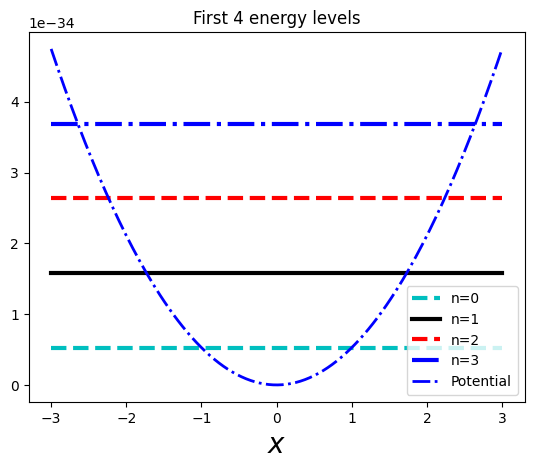

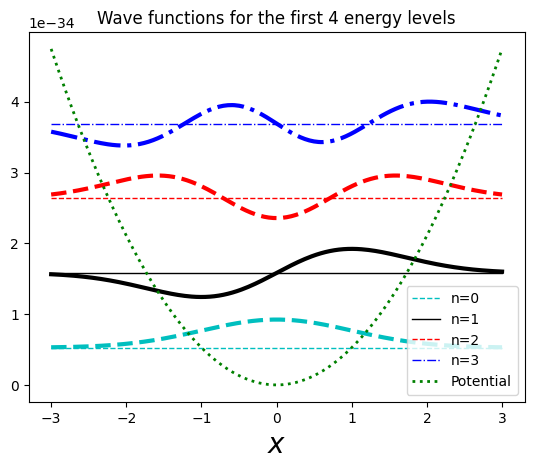

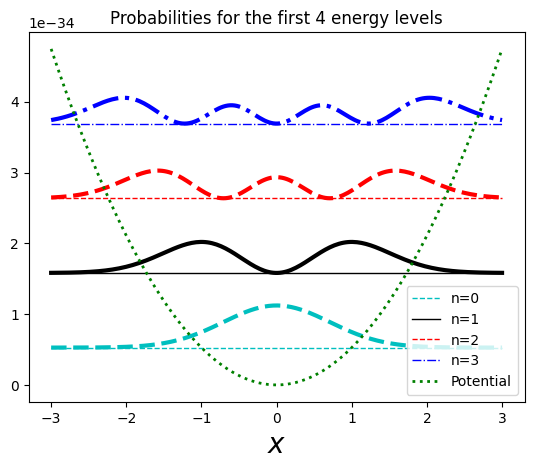

In [177]:
plot_energy_levels(4)
plot_wave_functions(4)
plot_probabilities(4)